In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
dataset=pd.read_csv("Breast_cancer.csv")
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [47]:
dataset.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [48]:
x = dataset.iloc[:, 9:-9].values
y = dataset["symmetry_worst"]

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Get the column names from the original dataset slice before x was converted to a numpy array
original_x_columns = dataset.iloc[:, 9:-9].columns
# Perform scaling on the numpy array x
scaled_x_array = sc.fit_transform(x)
# Convert the scaled numpy array back to a DataFrame with the original column names
x = pd.DataFrame(scaled_x_array, columns=original_x_columns)
x

,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst
0,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293
1,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203
2,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974
3,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984
4,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700
565,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399
566,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854
567,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=9)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [70]:
dt.score(x_train,y_train)*100

95.98773730920821

In [71]:
dt.score(x_test,y_test)*100

31.420119560164096

In [27]:
dt.predict(x_test)

array([0.3113, 0.246 , 0.3074, 0.2941, 0.2941, 0.4724, 0.273 , 0.2812,
       0.3216, 0.3693, 0.2356, 0.3055, 0.24  , 0.2434, 0.3016, 0.1902,
       0.253 , 0.2615, 0.2762, 0.2929, 0.323 , 0.3101, 0.3585, 0.2505,
       0.3604, 0.4378, 0.2487, 0.254 , 0.2615, 0.3672, 0.3267, 0.2369,
       0.3135, 0.2639, 0.2622, 0.271 , 0.31  , 0.3397, 0.3138, 0.31  ,
       0.3557, 0.2272, 0.2744, 0.321 , 0.2834, 0.2563, 0.2803, 0.2615,
       0.2911, 0.2238, 0.3074, 0.3198, 0.3153, 0.259 , 0.3168, 0.2048,
       0.2599, 0.3383, 0.2651, 0.2364, 0.3218, 0.3187, 0.3193, 0.2482,
       0.2757, 0.2249, 0.2576, 0.6638, 0.2458, 0.3019, 0.3215, 0.3055,
       0.2973, 0.2968, 0.2809, 0.2364, 0.2687, 0.3231, 0.2362, 0.3153,
       0.3695, 0.2615, 0.2718, 0.4378, 0.246 , 0.3135, 0.3596, 0.2398,
       0.2376, 0.2525, 0.3323, 0.2741, 0.323 , 0.1811, 0.3251, 0.2434,
       0.3013, 0.4724, 0.2758, 0.2196, 0.251 , 0.3409, 0.3109, 0.3103,
       0.2445, 0.2678, 0.2447, 0.1648, 0.3019, 0.2048, 0.3032, 0.2954,
      

In [58]:
from sklearn.tree import plot_tree

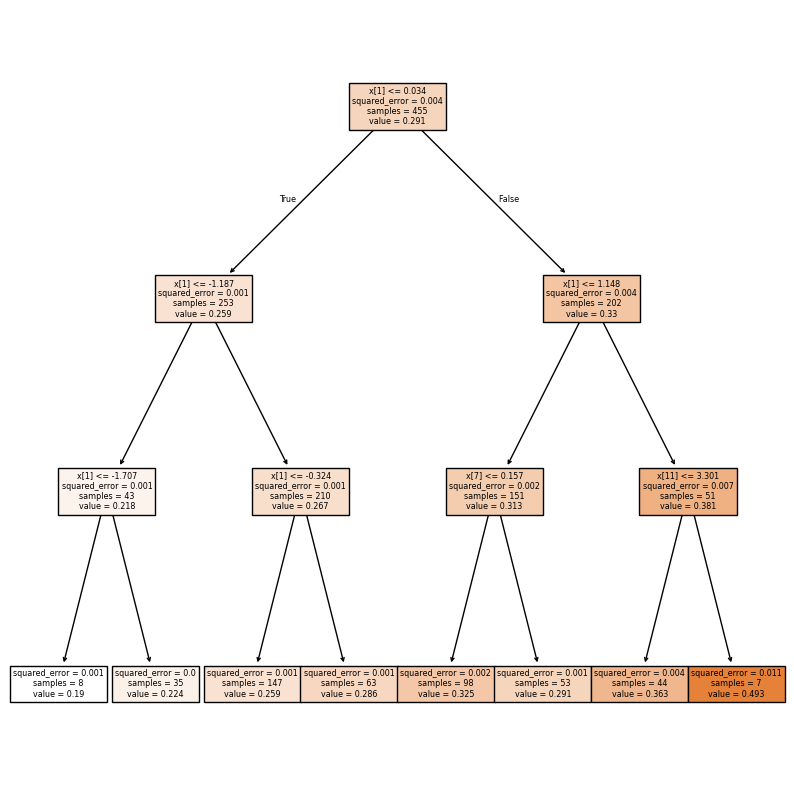

In [59]:
plt.figure(figsize=(10,10))
plot_tree(dt,filled=True)
plt.show()

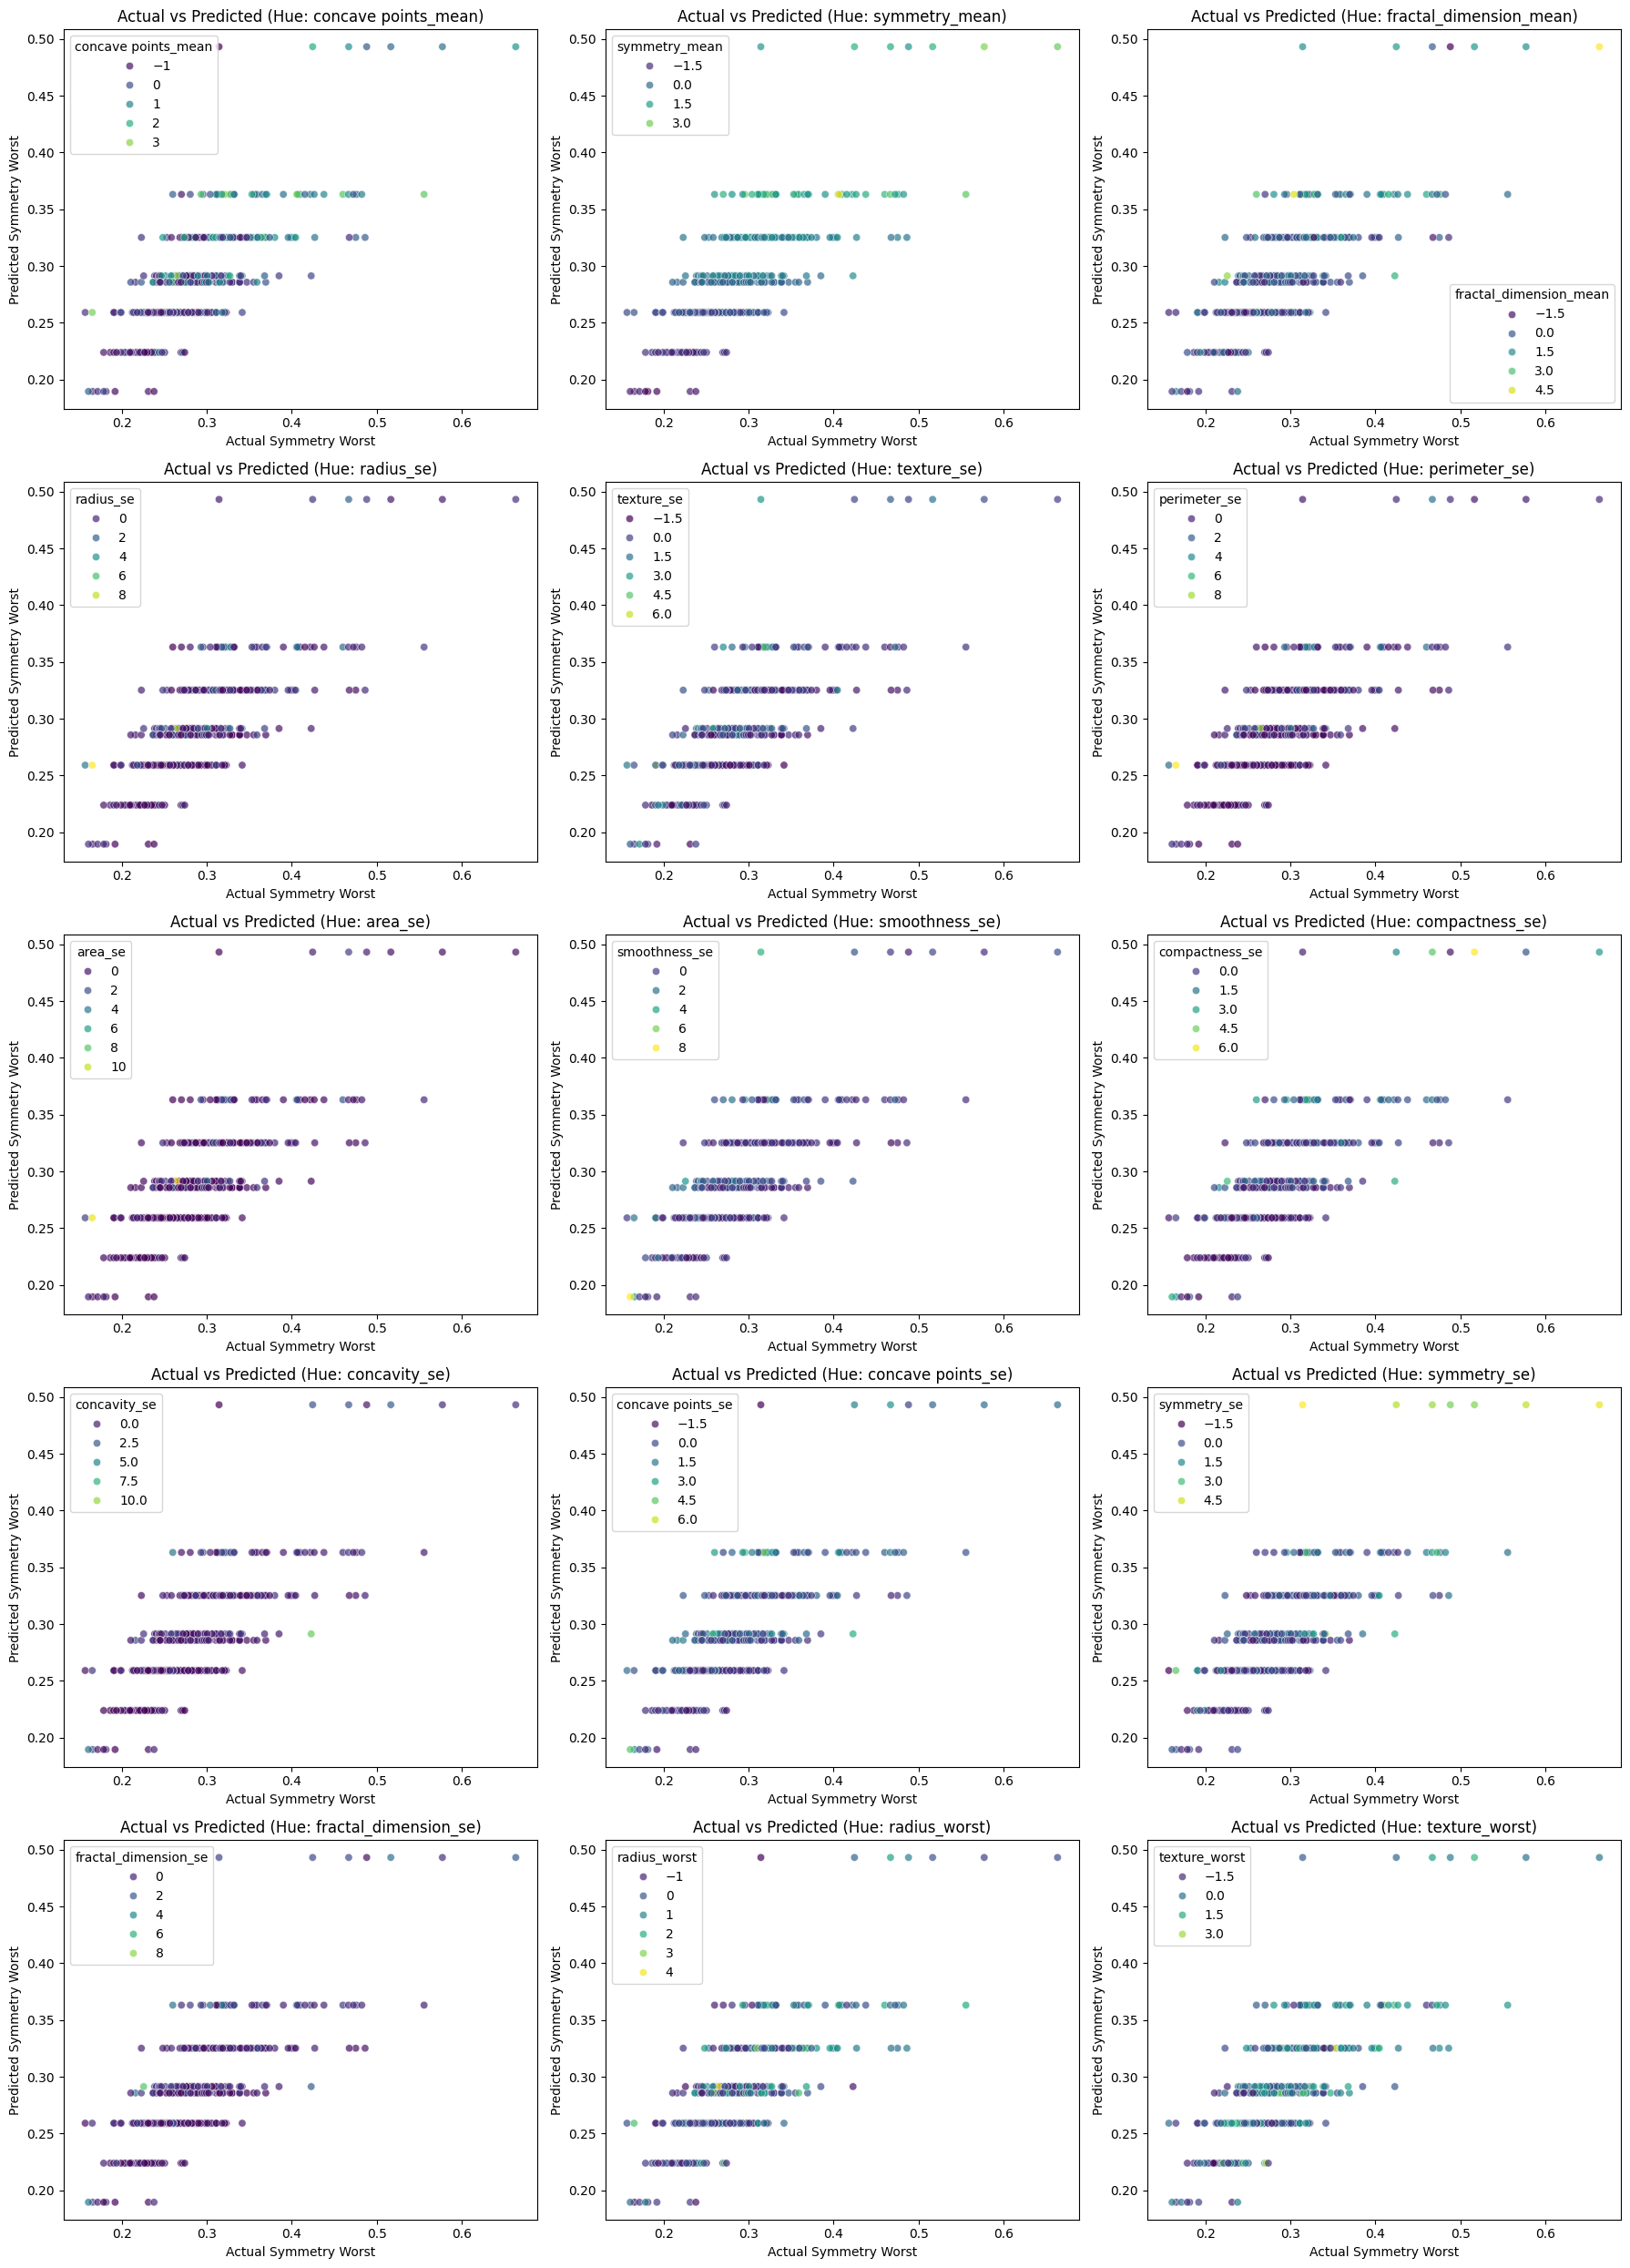

In [60]:
y_pred_train = dt.predict(x_train)

# Create a DataFrame for plotting, including actual, predicted, and all features
plot_data = x_train.copy()
plot_data['actual_symmetry_worst'] = y_train
plot_data['predicted_symmetry_worst'] = y_pred_train

# Set up the figure for multiple subplots
num_features = len(x_train.columns)
cols_per_row = 3
num_rows = (num_features + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 6, num_rows * 5))

for i, feature_col in enumerate(x_train.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.scatterplot(data=plot_data,
                    x='actual_symmetry_worst',
                    y='predicted_symmetry_worst',
                    hue=feature_col,
                    palette='viridis', # Using a sequential colormap for continuous hue
                    alpha=0.7)
    plt.title(f'Actual vs Predicted (Hue: {feature_col})')
    plt.xlabel('Actual Symmetry Worst')
    plt.ylabel('Predicted Symmetry Worst')

plt.tight_layout()
plt.show()

In [40]:
from mlxtend.plotting import plot_decision_regions

In [74]:
for i in range(1,10):
  dt = DecisionTreeRegressor(max_depth=i)
  dt.fit(x_train,y_train)
  print(dt.score(x_train,y_train),dt.score(x_test,y_test))
  # plt.figure(figsize=(10,10))
  # plt.show()

0.3188032965900809 0.3095459376297077
0.46358817008007847 0.41927093089356604
0.5631492050685678 0.5553794714813005
0.6784025091713186 0.42288302851830417
0.7954207548284823 0.3953632202833688
0.8506870037949656 0.3673746975897825
0.8966679836045962 0.40065621288534536
0.9356347947792398 0.4108377003194602
0.9598773730920821 0.32206864678478475
